# Data science blog using web API data from Kaggle

## 1. System Setup

### 1.1 Credits
- Kaggle API for retrieving data https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
- Tutorial for nomalising data https://www.digitalocean.com/community/tutorials/normalize-data-in-python
- Kaggle submission using the airbnb dataset https://www.kaggle.com/code/ibabarx/airbnb-prices-in-european-cities#notebook-container

### 1.2 Setup Packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import os
#import kaggle
#import streamlit as st
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector

### 1.3 Setup color palette
There is one palette that will be used throughout the case,
PaletteC is a 10 color palette for all the 10 Cities,

In [40]:
paletteC = ['#A6CEE3','#FF7F00', '#CAB2D6', '#33A02C', '#FDBF6F', '#E31A1C', '#6A3D9A', '#FB9A99', '#B2DF8A', '#1F78B4']
sns.color_palette(paletteC)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

In [41]:
sns.set_theme(style='whitegrid', palette=paletteC)

## 2. Import Data

### 2.1 Import and unpack from API

In [42]:
# Importing databases
!kaggle datasets download -d thedevastator/airbnb-prices-in-european-cities

airbnb-prices-in-european-cities.zip: Skipping, found more recently modified local copy (use --force to force download)


Kaggle data is taken from the API in zip format. The following code block will unzip the datasets so they can be used in our project.

In [43]:
!unzip airbnb-prices-in-european-cities.zip -d Datasets

Archive:  airbnb-prices-in-european-cities.zip
replace Datasets/amsterdam_weekdays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Move extracted CSV files into dataframes.

In [60]:
amsterdam_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/athens_weekdays.csv')
athens_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/athens_weekends.csv')
barcelona_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/berlin_weekdays.csv')
berlin_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/berlin_weekends.csv')
budapest_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/budapest_weekdays.csv')
budapest_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/lisbon_weekends.csv')
london_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/london_weekdays.csv')
london_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/london_weekends.csv')
paris_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/paris_weekdays.csv')
paris_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/paris_weekends.csv')
rome_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/rome_weekdays.csv')
rome_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/rome_weekends.csv')
vienna_weekdays = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/vienna_weekdays.csv')
vienna_weekends = pd.read_csv('/Users/laurenmeenhorst/Desktop/DataScienceBlogForHVA/Datasets/vienna_weekends.csv')

In [61]:
def combine(csv_1, col_1, csv_2, col_2, city):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

#### Merge week and weekend data

In [62]:
Amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
Athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
Barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
Berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
Budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
Lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
London = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
Paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
Rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
Vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

#### Merge Cities

In [63]:
cities = [Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna]
city_names = [city.city.unique()[0].capitalize() for city in cities]
europe_data = pd.concat(cities, ignore_index=True)
europe_data.drop(columns = ['Unnamed: 0'], inplace=True)

### 2.2 Initial data inspection of European Airbnb data
1. realSum, The total price of the Airbnb listing. (Numeric)
2. room_type, The type of room being offered (e.g. private, shared, etc.). (Categorical)
3. room_shared, Whether the room is shared or not. (Boolean)
4. room_private, Whether the room is private or not. (Boolean)
5. person_capacity, The maximum number of people that can stay in the room. (Numeric)
6. host_is_superhost, Whether the host is a superhost or not. (Boolean)
7. multi, Whether the listing is for multiple rooms or not. (Boolean)
8. biz, Whether the listing is for business purposes or not. (Boolean)
9. cleanliness_rating, The cleanliness rating of the listing. (Numeric)
10. guest_satisfaction_overall, The overall guest satisfaction rating of the listing. (Numeric)
11. bedrooms, The number of bedrooms in the listing. (Numeric)
12. dist, The distance from the city centre. (Numeric)
13. metro_dist, The distance from the nearest metro station. (Numeric)
14. lng, The longitude of the listing. (Numeric)
15. lat, The latitude of the listing. (Numeric)

In [64]:
# Take a look at the top rows
europe_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


In [65]:
# Take a look at a random sample
europe_data.sample(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
38194,504.240843,Entire home/apt,False,False,6.0,False,0,0,9.0,94.0,...,3.625771,0.131545,387.478193,18.841155,700.064440,32.295605,2.30518,48.84771,weekends,paris
27150,386.415485,Private room,False,True,2.0,False,0,0,9.0,80.0,...,6.197214,1.221088,176.612173,12.277001,373.798939,6.690350,-0.12831,51.45263,weekends,london
30422,153.108022,Private room,False,True,2.0,False,1,0,10.0,100.0,...,6.592716,0.326538,172.457432,11.988188,378.707822,6.778210,-0.10180,51.56537,weekends,london
40272,126.715451,Private room,False,True,2.0,False,1,0,10.0,100.0,...,6.425252,1.590093,164.088406,3.636231,441.182091,9.605776,12.45731,41.85378,weekdays,rome
31206,226.251793,Private room,False,True,4.0,False,0,1,9.0,90.0,...,1.964015,0.366253,525.880902,36.556032,1279.377896,22.898635,-0.14067,51.49270,weekends,london
6559,126.309376,Entire home/apt,False,False,2.0,True,0,1,9.0,100.0,...,2.938704,0.539023,76.897567,2.897326,106.754671,1.594268,23.70300,37.96900,weekends,athens
44583,115.259626,Private room,False,True,2.0,False,0,1,9.0,90.0,...,3.931174,1.591514,338.312910,7.495473,911.763761,19.865120,12.46400,41.88000,weekends,rome
7015,92.798725,Entire home/apt,False,False,2.0,False,0,0,10.0,95.0,...,2.068296,0.148725,87.958814,3.314089,129.144840,1.928641,23.72895,37.99348,weekends,athens
15876,277.999718,Entire home/apt,False,False,4.0,False,1,0,10.0,100.0,...,2.098629,0.520843,166.809870,9.955868,249.348177,21.797506,19.05364,47.51743,weekends,budapest
50162,179.510553,Entire home/apt,False,False,2.0,False,0,1,10.0,98.0,...,3.399207,0.797678,88.218425,6.317621,123.952787,2.995891,16.32800,48.21041,weekends,vienna


In [66]:
# Take a look at feature information
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [67]:
europe_data.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week_time                     0
city                          0
dtype: int64

In [68]:
# Statistical description of our data
europe_data.describe(include='all')

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
count,51707.000000,51707,51707,51707,51707.000000,51707,51707.000000,51707.000000,51707.000000,51707.000000,...,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707,51707
unique,NaN,3,2,2,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10
top,NaN,Entire home/apt,False,False,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekends,london
freq,NaN,32648,51341,33014,NaN,38475,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26207,9993
mean,279.879591,NaN,NaN,NaN,3.161661,NaN,0.291353,0.350204,9.390624,92.628232,...,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,NaN,NaN
std,327.948386,NaN,NaN,NaN,1.298545,NaN,0.454390,0.477038,0.954868,8.945531,...,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,NaN,NaN
min,34.779339,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,...,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,NaN,NaN
25%,148.752174,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,...,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,NaN,NaN
50%,211.343089,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,...,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,NaN,NaN
75%,319.694287,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,99.000000,...,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,NaN,NaN


### 2.3 Initial data cleaning - removing outliers
Now we want to look for outliers, we expect the outliers to be in the realSum, as we saw with the .describe() that the max was 18545 and the min was 35

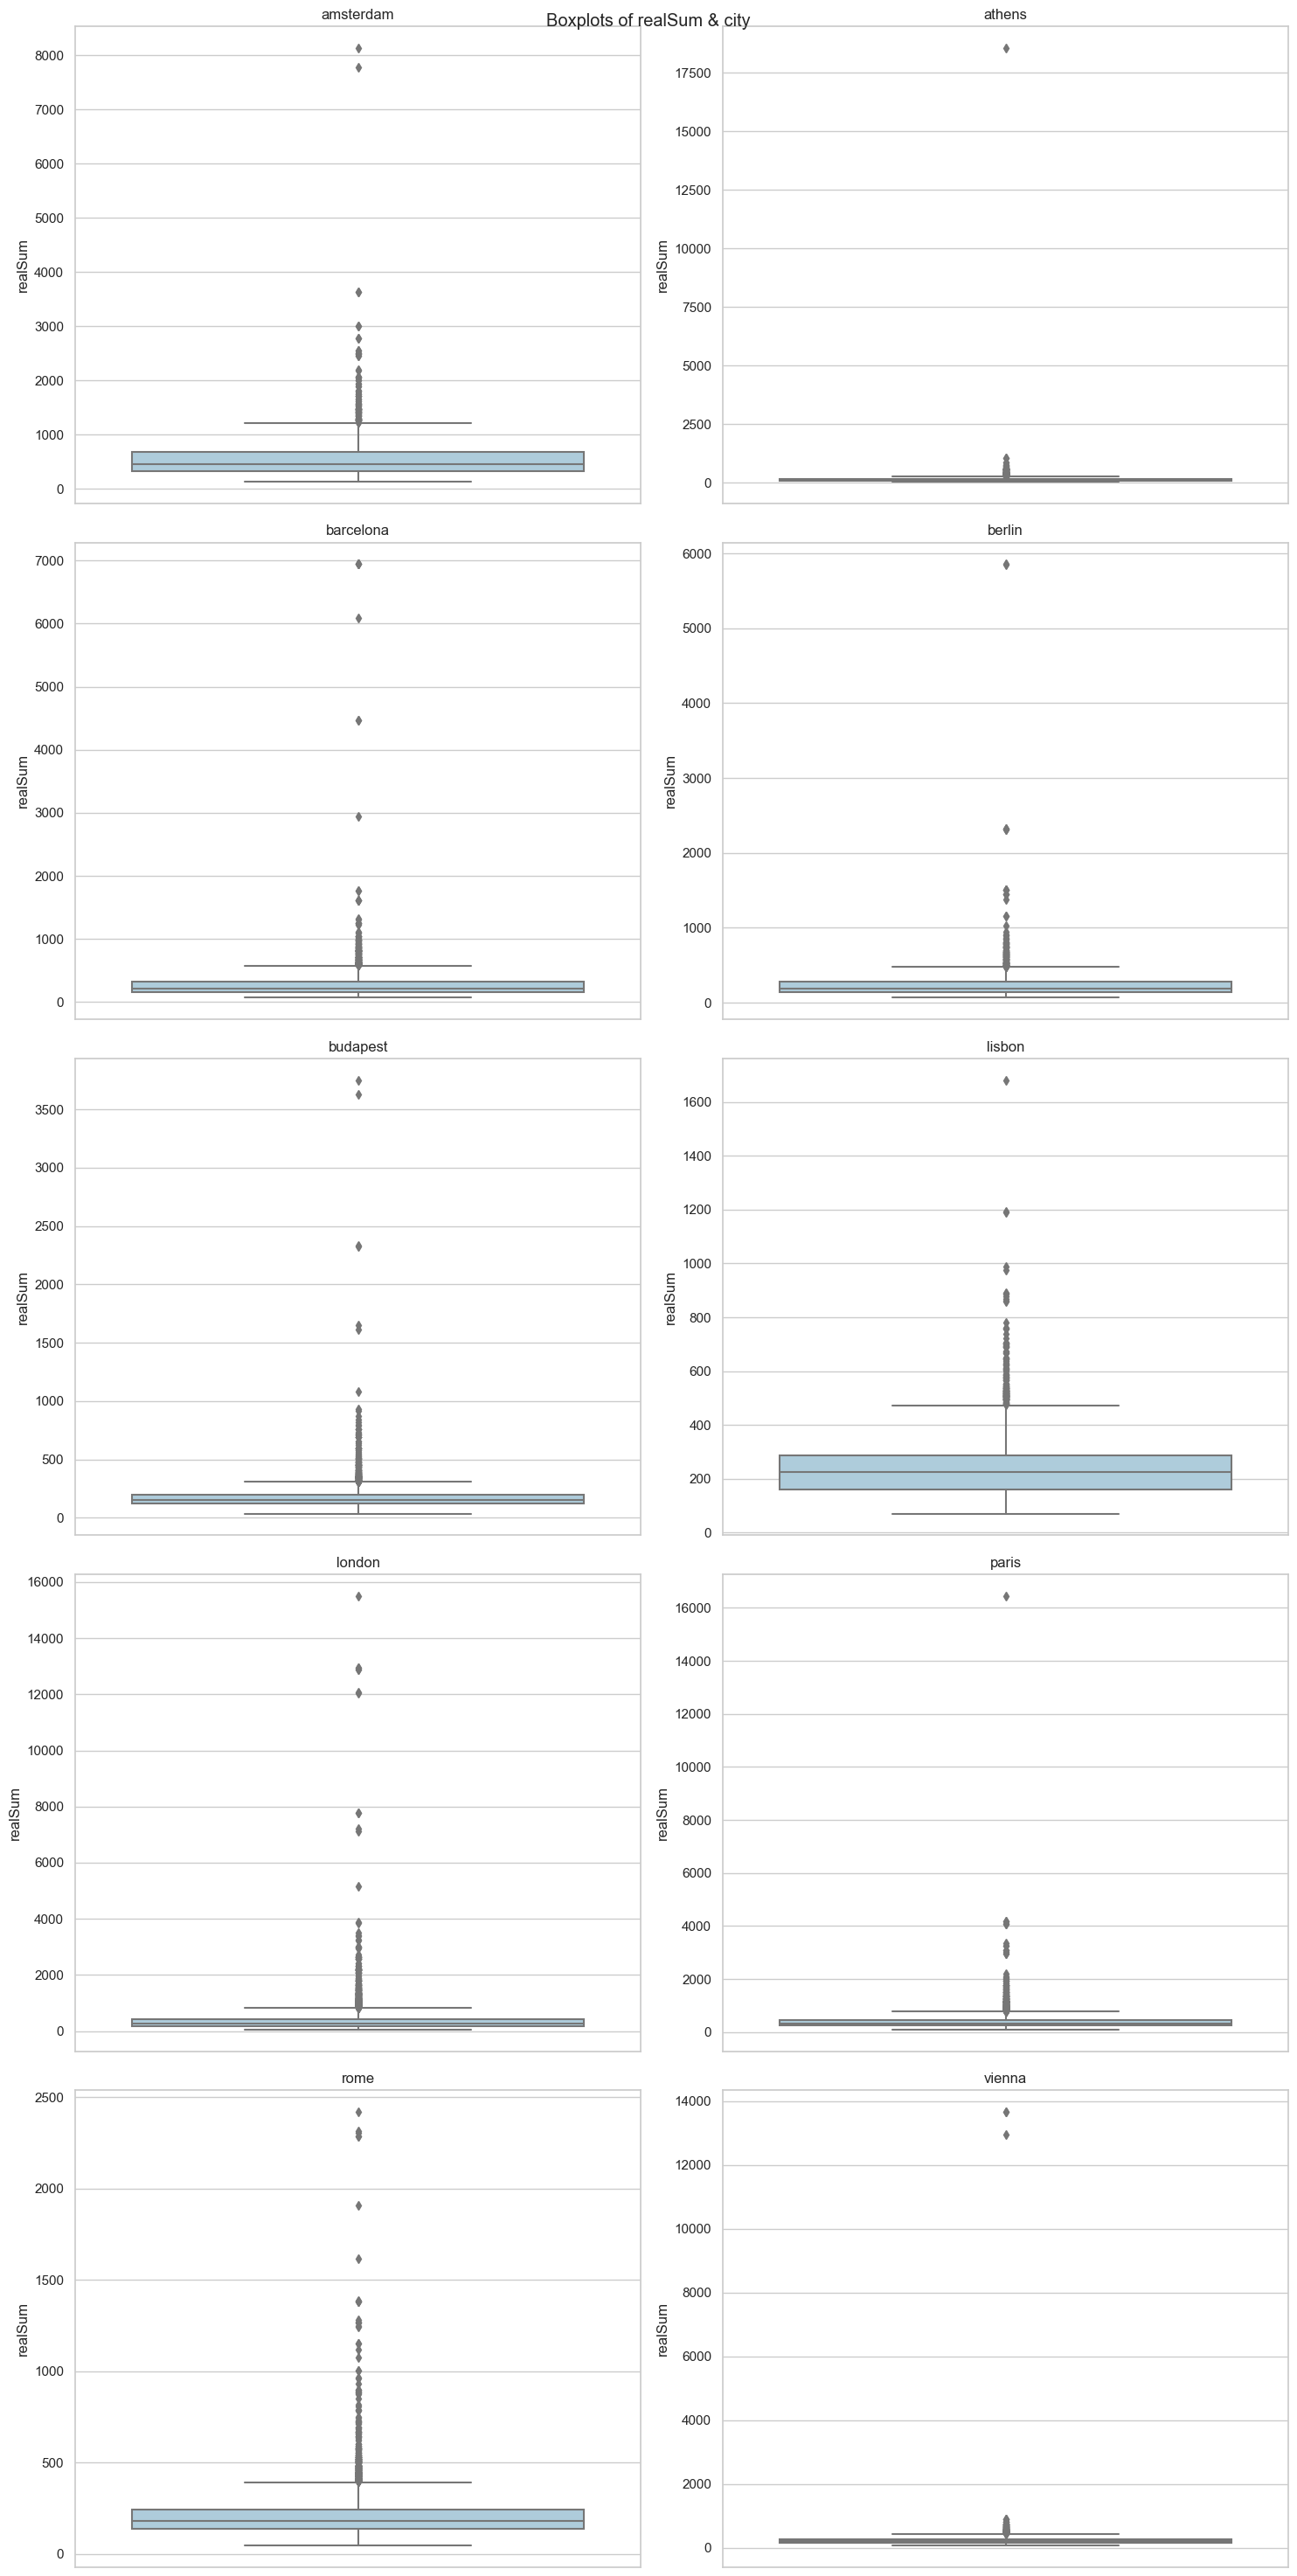

In [69]:
fig, ax = plt.subplots(5,2, sharex=True, figsize=(15,30))
fig.suptitle('Boxplots of realSum & city')

for i, city in enumerate(europe_data['city'].unique()):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=ax[row, col], data=europe_data[europe_data['city'] == city], y='realSum')
    ax[row, col].set_title(city)

plt.tight_layout()
plt.show()

We determined that there are outliers in the realSum. Our decision was that an outlier is a value in realSum that is at least 1000 above the below outlier, by looking at the boxplots above we can determine the following values as non-outliers and add them to a new dataset.

In [70]:
cities_2 = [Amsterdam[Amsterdam['realSum'] < 2000], Athens[Athens['realSum'] < 500], Barcelona[Barcelona['realSum'] < 1000], Berlin[Berlin['realSum'] < 800], Budapest[Budapest['realSum'] < 550], Lisbon[Lisbon['realSum'] < 650], London[London['realSum'] < 1500], Paris[Paris['realSum'] < 1200], Rome[Rome['realSum'] < 550], Vienna[Vienna['realSum'] < 750]]

In [71]:
europe_data_2 = pd.concat(cities_2, ignore_index=True)

In [72]:
europe_data_2.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000,51176.000000
mean,1619.540136,263.785977,3.145869,0.291562,0.349637,9.388698,92.606065,1.149328,3.198368,0.683459,292.396435,13.340328,623.876219,22.688302,7.427604,45.665365
std,1216.518149,181.924134,1.288028,0.454486,0.476860,0.955359,8.946068,0.617112,2.397423,0.861179,222.671168,9.692772,495.464940,17.756666,9.807457,5.250456
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,645.000000,148.405632,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.455985,0.248913,136.072325,6.354334,249.825898,8.716792,-0.072500,41.399160
50%,1334.000000,208.911031,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.621214,0.413968,233.259410,11.417817,520.379828,17.463615,4.873450,47.506630
75%,2380.000000,313.036525,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.269726,0.739540,383.608836,17.341402,829.794258,32.801151,13.537420,51.471185
max,5378.000000,1997.515994,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


Now we will take a look at the boxplots after the outliers have been removed:

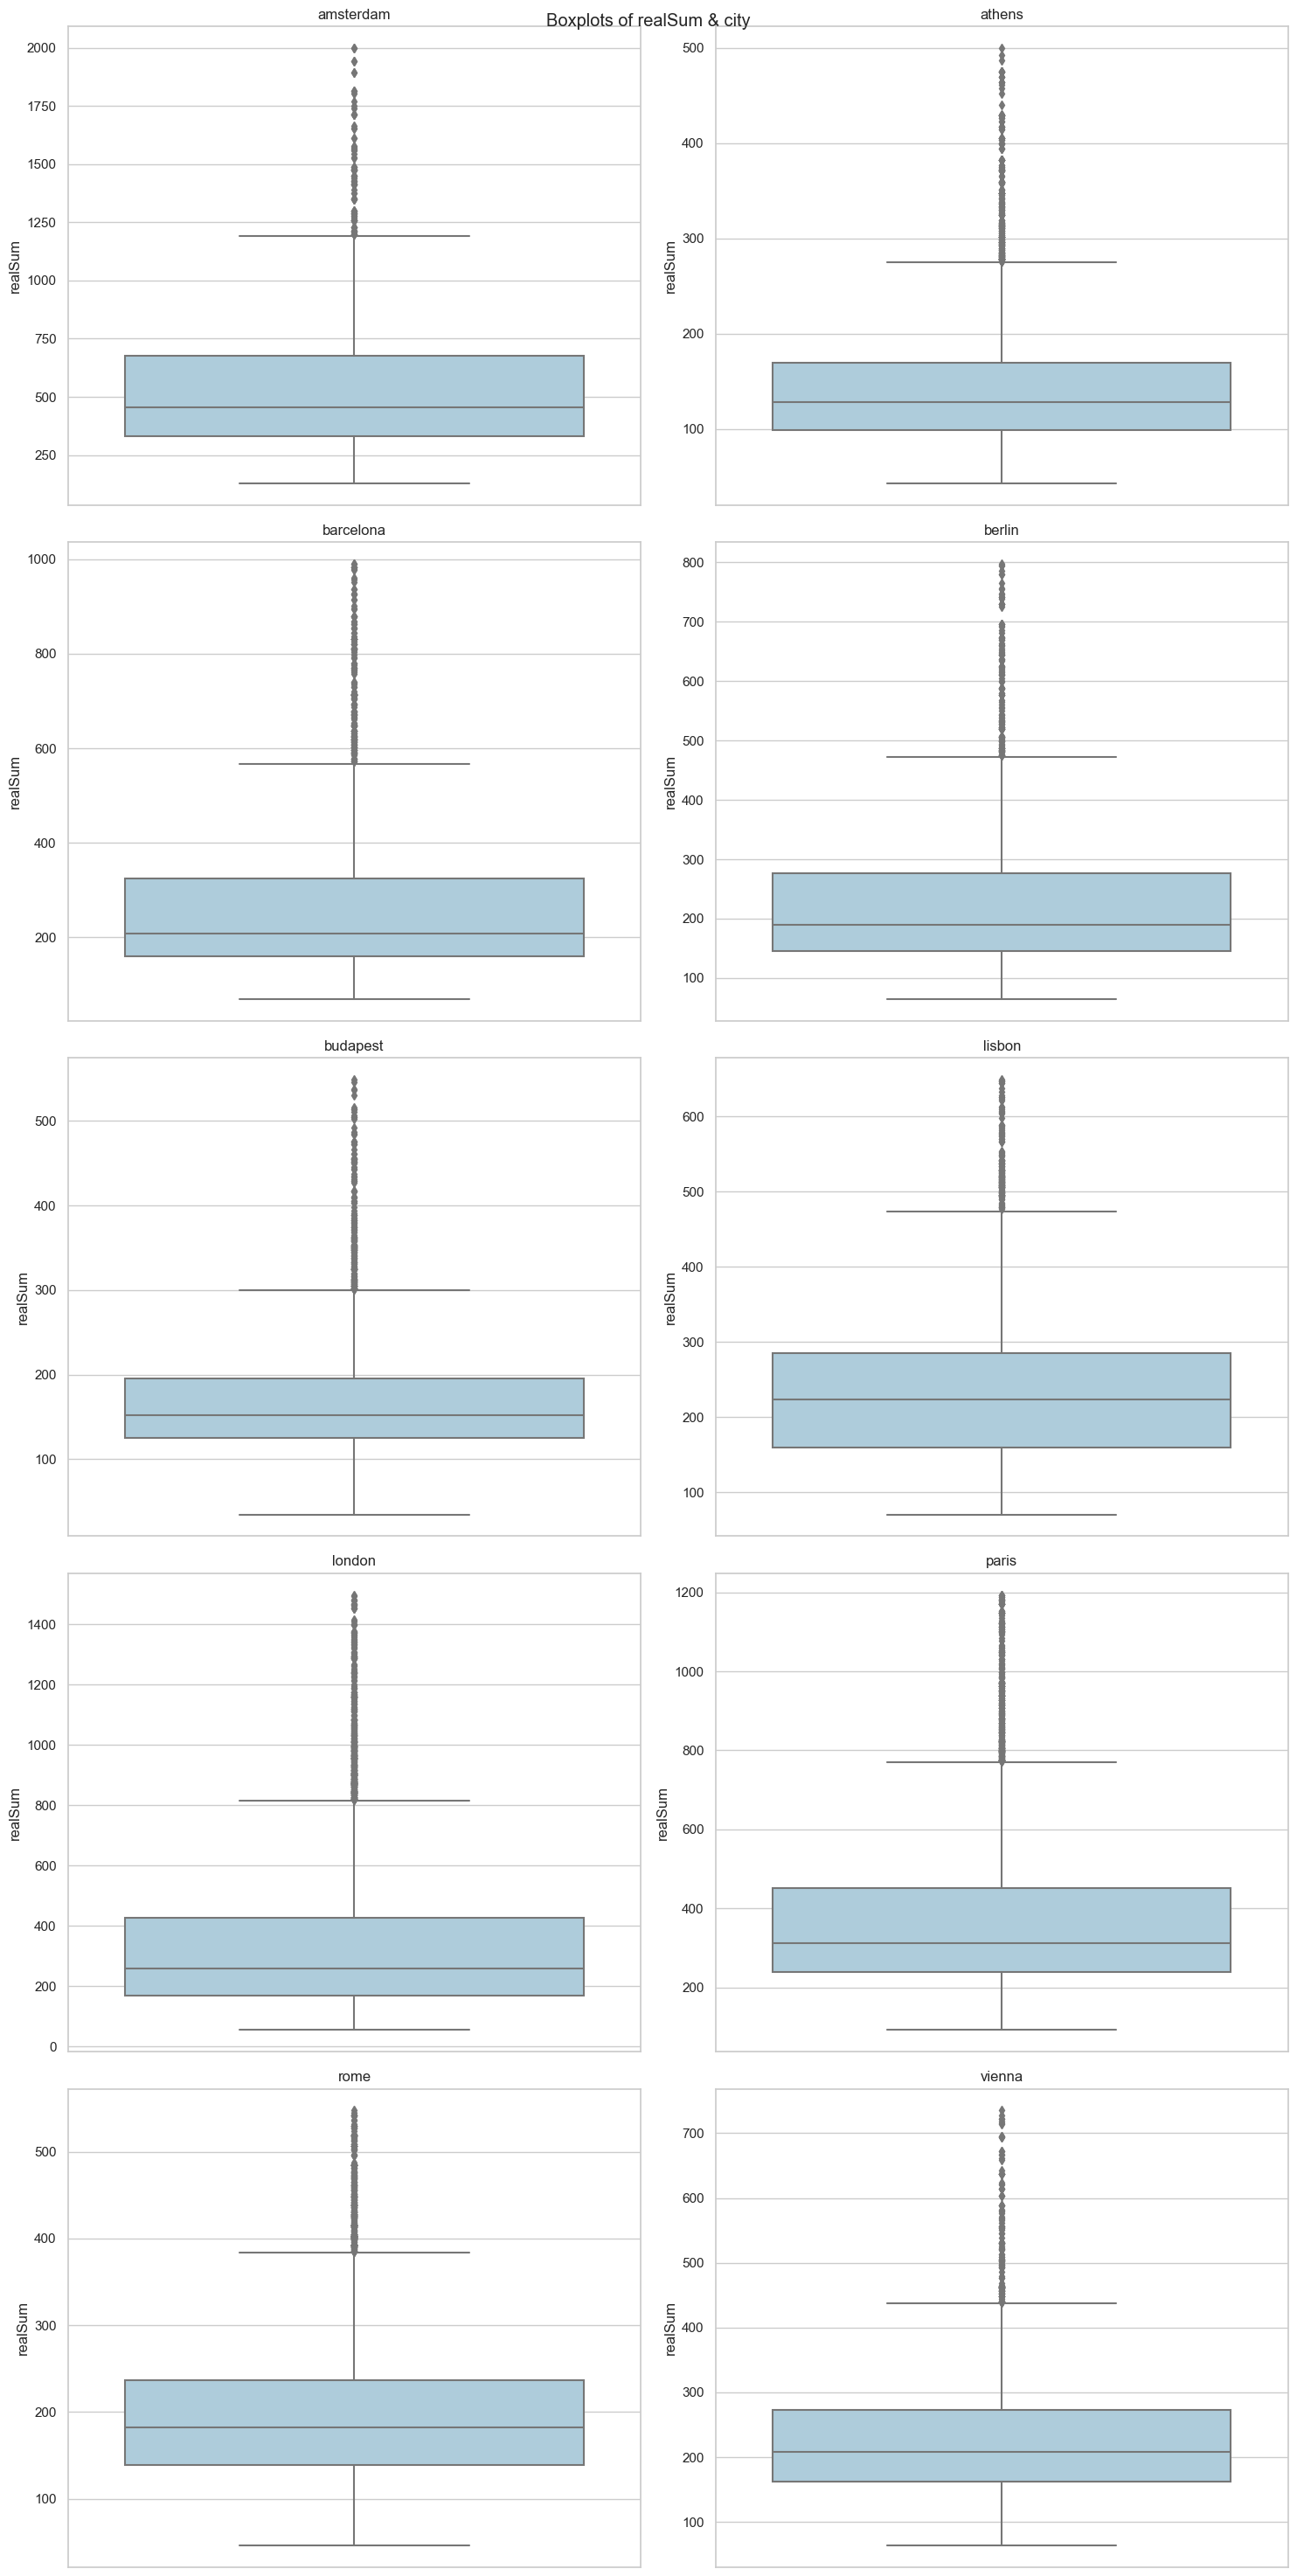

In [73]:
fig, ax = plt.subplots(5,2, sharex=True, figsize=(15,30))
fig.suptitle('Boxplots of realSum & city')

for i, city in enumerate(europe_data_2['city'].unique()):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=ax[row, col], data=europe_data_2[europe_data_2['city'] == city], y='realSum')
    ax[row, col].set_title(city)

plt.tight_layout()
plt.show()

### 2.4 export europe data 2 to CSV
Now we will export europe data 2 so we can use it in our streamlit app.

In [74]:
europe_data_init = europe_data_2
europe_data_init.drop(['Unnamed: 0'], axis=1)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51171,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,weekends,vienna
51172,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,weekends,vienna
51173,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,weekends,vienna
51174,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,weekends,vienna


In [75]:
# save cleaned data to csv file
europe_data_init.to_csv('europe_data_init.csv', index=False)

## 3. Exploratory Data analysis
With the outliers removed we can look at the influence of the variables on the realSum.

### 3.1 Comparing the effect of time of week on prices

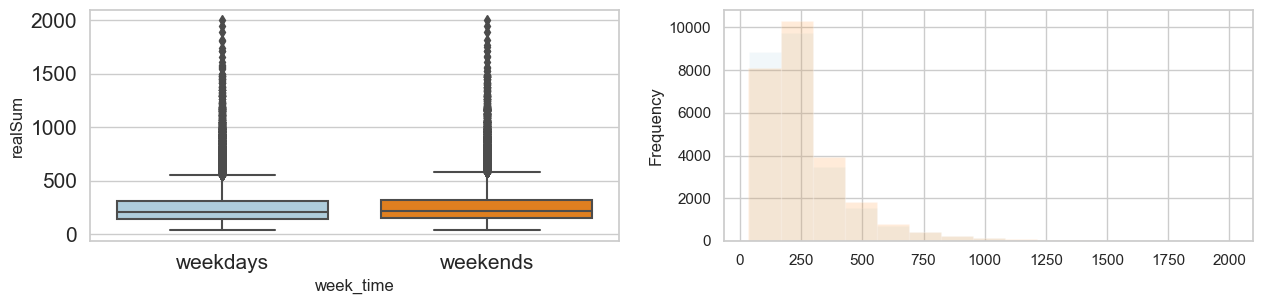

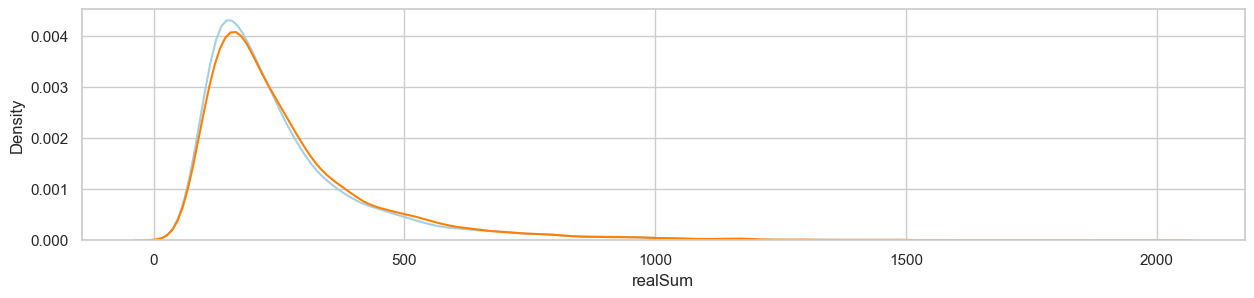

In [76]:
plt.figure

# Create layout of our plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))

# boxplot of realsum by week time
sns.boxplot(y='realSum', data=europe_data_2,x='week_time',ax = axs[0])
axs[0].tick_params(axis='y', labelsize=15)
axs[0].tick_params(axis='x', labelsize=15)

# layered hist of realsum by weektime
europe_data_2.groupby('week_time')['realSum'].plot(kind='hist', alpha=0.15, bins=15,ax=axs[1])

# kernel density estimate of realsum for weekdays and weekends
sns.kdeplot(data=europe_data_2[europe_data_2['week_time'] == 'weekdays']['realSum'], label='weekdays',ax=axs2)
sns.kdeplot(data=europe_data_2[europe_data_2['week_time'] == 'weekends']['realSum'], label='weekends',ax=axs2)
plt.subplots_adjust(hspace=0.65)
plt.show()

In the previous plots we can see that week time had almost no influence on realsum.

We will split the figure by city in order to check wether the effect differs per city.

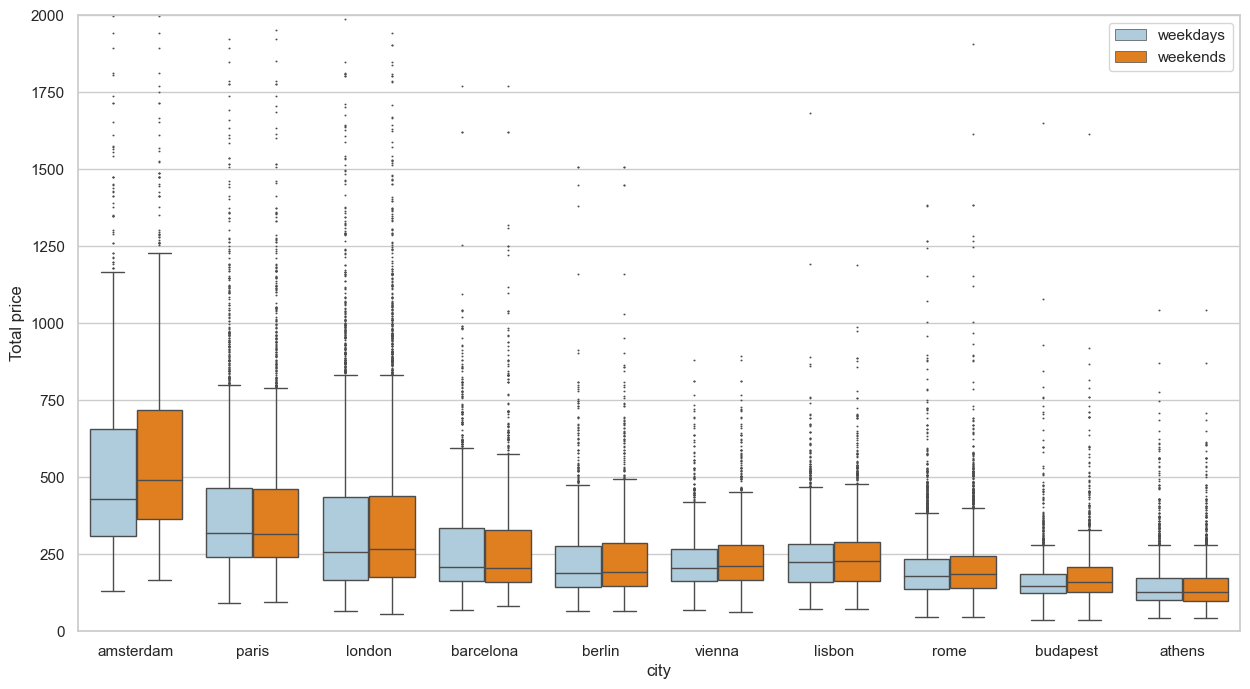

<Figure size 640x480 with 0 Axes>

In [77]:
# Rank cities
ranks = europe_data.groupby('city')['realSum'].mean().sort_values()[::-1].index

plt.figure(figsize=(15, 8))
ax = plt.subplot()
plt.axis([0,8,0,2000])

sns.boxplot(data=europe_data, x="city", y="realSum", hue="week_time",
            fliersize=0.5, linewidth=1, order=ranks)
plt.ylabel('Total price')
ax.set_xticklabels(ranks)
plt.legend(loc=1)
plt.show()
plt.clf()

We can see that the effect stays minor.

### 3.2 Frequency distribution of numeric features

In [78]:
# List all numerical features, ignore booleans
numerical_features = list(europe_data_2.select_dtypes(include=['int64','float64']).columns[i] for i in [2,5,6,7,8,9,10,11,12,13,14,15])

numerical_features

['person_capacity',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

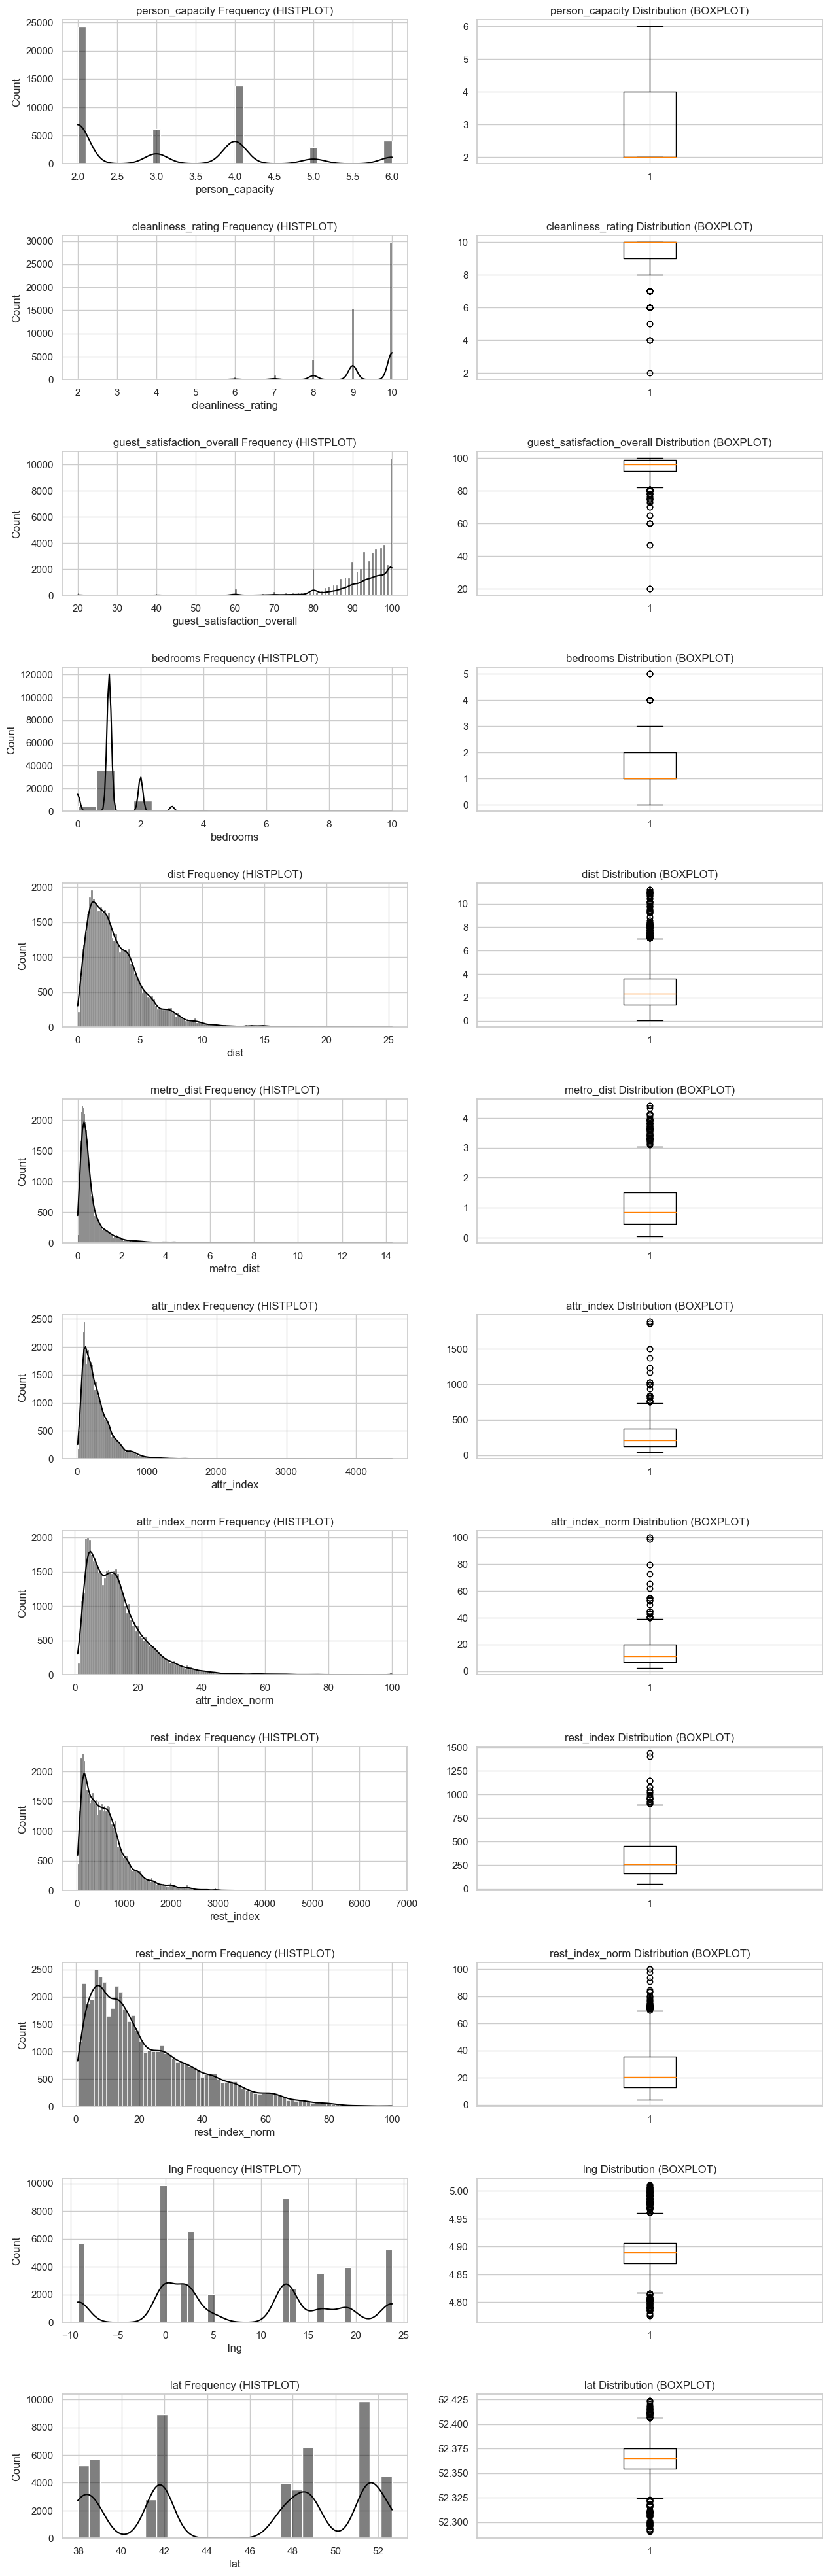

In [79]:
# Define a plotter function, so we can plot all the features in one go
def plotter_numerical (feature, color, row):
    sns.histplot(data = europe_data_2[feature], ax=axes[row, 0], kde=True, color=color,line_kws={'color': 'Yellow'})
    axes[row,0].set_title(str(feature)+" Frequency (HISTPLOT)")
    axes[row,1].boxplot(Amsterdam[feature])
    axes[row,1].set_title(str(feature)+" Distribution (BOXPLOT)")

plt.figure
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(15, 50))
for i in range(12):
    plotter_numerical( numerical_features[i] , '#000000' , i)

plt.subplots_adjust(hspace=0.50)
plt.show()

**Conclusions from the prev figure**
- The people capacity in descending order of frequency is 2,4,3,6 and 5 for european Airbnb listings.
- European Airbnb listings have a cleanliness rating overall. The distribution can be considered left skewed.
- Overall customer satisfaction seems to follow the same pattern as cleanlines rating.
- Most listings are between 0 and 7 km from the city centre.
- Most listings are within 3 km of the nearest metro station

### 3.3 Scatterplots of numeric features including realsum trendline

In [ ]:
# Define a plotter function, so we can plot all the features in one go
def plotter_numerical_scatter (feature, color, x, y):
    axes[x,y].scatter(y=europe_data_2["realSum"], x=europe_data_2[feature],c=color)
    trend_line = np.poly1d(np.polyfit(europe_data_2[feature],europe_data_2["realSum"], 1))
    axes[x,y].plot(europe_data_2[feature], trend_line(europe_data_2[feature]), "r--")
    axes[x,y].set_ylabel("Price")
    axes[x,y].set_xlabel(feature)

# define the layout for our plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 17.5))
x = 0
y = 0
for i in range(12):
    plotter_numerical_scatter(numerical_features[i] , '#ADD8E6',x,y)
    y  = y + 1
    if y == 3:
        x = x + 1
        y = 0

plt.subplots_adjust(hspace=0.5)

**Conclusions from the prev figure**
- No bedrooms, person capacity,attraction index and restaurant index show a positive trend-line as their value increases.
- Cleanliness rating and guest satisfaction seem to have a neutral trend-line which is unexpected.
- Dist from centre and metro have a slight negative impact on price as they increase.

### 3.3 Analysis of categorical and binary features

In [ ]:
categorical_features = ['room_type','room_shared','room_private','host_is_superhost','multi','biz','week_time']

In [ ]:
# Define a plotter function, so we can plot all the features in one go
def plotter_categorical_bar_and_box (feature, color, row):
    axes[row,0].bar(x = list(europe_data_2[feature].value_counts().index), height=list(europe_data_2[feature].value_counts().values),color=color)
    axes[row,0].set_ylabel("Counts")
    axes[row,0].set_title(str(feature)+" COUNTS (BARPLOT)")

    sns.boxplot(data=europe_data_2,x = feature,y = 'realSum',ax=axes[row,1])
    axes[row,1].set_ylabel("Price")
    axes[row,1].set_title(str(feature)+" RELATION WITH REALSUM")


plt.figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

for i in range(7):
    plotter_categorical_bar_and_box(categorical_features[i] , '#ADD8E6' , i)

plt.subplots_adjust(hspace=0.50)
plt.show()

## 4. Data Cleaning / Pre-processing

In [ ]:
europe_data_2.columns

### 4.1 Change boolean True/False to 1/0

In [ ]:
europe_data_2.replace({False: 0, True: 1},inplace=True)
europe_data_2.head()

### 4.2 Replace categorical vars with dummy variables
We want to use our categorical values in our model so we will have to replace them with dummies.

In [ ]:
europe_data_2_categorical_dummies = pd.get_dummies(europe_data_2[['room_type','week_time','city']],drop_first=True)
europe_data_3 = pd.concat([europe_data_2_categorical_dummies, europe_data_2.drop(columns=['room_type','week_time', 'city'])], axis=1)

In [ ]:
europe_data_3.head()

There are slight variances in median realSum of different cities in order to use this to train our model we have made a dummy for the different cities.

### 4.3 Check feature correlation

In [ ]:
plt.figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))
sns.heatmap(europe_data_3.corr(),cmap=sns.color_palette("Paired",20),annot=True,ax=axes)

- Room shared and room private have a perfect correlation with room_type_shared and private which makes these features redundant.
- rest_index_norm and attr_index_norm are normalised features. We also have the non normalised versions of these features so we don't need them right now.

### 4.4 Remove unused cols

In [ ]:
europe_data_3.drop(['Unnamed: 0', 'room_shared', 'room_private', 'rest_index_norm','attr_index_norm'], axis=1)

### 4.5 Normalising the features
Data is commonly rescaled to fall between 0 and 1, because machine learning algorithms tend to perform better, or converge faster, when the different features are on a smaller scale. Before training machine learning models on data, it’s common practice to normalize the data first to potentially get better, faster results. Normalization also makes the training process less sensitive to the scale of the features, resulting in better coefficients after training.

In [ ]:
Standard_Scaler = StandardScaler()

In [ ]:
features_to_normalise= ['person_capacity',
                        'cleanliness_rating',
                        'guest_satisfaction_overall',
                        'bedrooms',
                        'dist',
                        'metro_dist',
                        'attr_index',
                        'rest_index',
                        'lng',
                        'lat']
features_not_to_normalise = ['room_type_Private room',
                         'room_type_Shared room',
                         'week_time_weekends',
                         'city_athens',
                         'city_barcelona',
                         'city_berlin',
                         'city_budapest',
                         'city_lisbon',
                         'city_london',
                         'city_paris',
                         'city_rome',
                         'city_vienna',
                         'realSum',
                         'host_is_superhost',
                         'multi',
                         'biz',]

In [ ]:
normalised_features = pd.DataFrame(Standard_Scaler.fit_transform(europe_data_3[features_to_normalise]), columns=features_to_normalise)
normalised_features.head()

In [ ]:
europe_data_final = pd.concat([normalised_features.reset_index(drop=True),  europe_data_3[features_not_to_normalise].reset_index(drop=True)], axis=1)
europe_data_final.head()

## 6. Building a model

### 6.1 create inputs and outputs

In [ ]:
X_train , X_test , Y_train , Y_test = \
    train_test_split(europe_data_final.drop(columns=['realSum']),
                     europe_data_final['realSum'],
                     random_state=4,
                     test_size=0.15,
                     stratify=europe_data_final[['week_time_weekends', 'city_athens','city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']])

### 6.2 Sequential feature selection

In [ ]:
def sequential_feature_selection(model,X_train,Y_train,X_test):
    sfs = SequentialFeatureSelector(model,  direction='backward', scoring='r2', cv=5)
    sfs.fit(X_train, Y_train)
    X_train_selected = sfs.transform(X_train)
    X_test_selected = sfs.transform(X_test)
    return X_train_selected, X_test_selected

### 6.3 Linear regression

In [ ]:
LR = LinearRegression()

In [ ]:
X_train_selected, X_test_selected = sequential_feature_selection(LinearRegression(),X_train,Y_train,X_test)

In [ ]:
LR.fit(X_train_selected, Y_train)

In [ ]:
LR_TrainSet_Prediction = LR.predict(X_train_selected)
LR_TestSet_Prediction = LR.predict(X_test_selected)

train_score = LR.score(X_train_selected, Y_train)
test_score = LR.score(X_test_selected, Y_test)
print(train_score, test_score)

In [ ]:
plt.scatter(Y_test, LR_TestSet_Prediction, color='#FC814A', alpha=.2)
plt.axis([0,1500,-200,1000])
plt.ylabel('Predicted Airbnb prices')
plt.xlabel('Actual Airbnb prices')
plt.title('Predicted vs Actual Airbnb prices')
plt.show()
plt.close()

In [ ]:
# Take a look at a random sample
europe_data_final.sample(1)

In [ ]:
airbnb_apartment_paris = [[-0.88964, 0.639872, 0.044035, -0.241981, 0.292298, -0.630045, 0.316806, 0.097607, -0.522647, 0.60589,0,1]]
#438.997111,
predicted_airbnb_apartment_ams = LR.predict(airbnb_apartment_paris)
print('Test apartment = entire apartment, no room shared, private room, 2 person capacity, not a superhost, multiple rooms, not intended for business, cleanliness rating of 9.5, overal guest rating of 9.2, has one bedroom  is 500 meters from city center, 1km from metro, longitude of 5, latitude of 52, listing for weekdays, in Paris')
print('-------------------------------------------------------------------------')
print("Predicted realSum for appartment: €%.2f" % predicted_airbnb_apartment_ams)

In [ ]:
fit_model.save_model('xgb_model.json')